In [4]:
import pandas as pd
import numpy as np

In [5]:
train=pd.read_csv("train.csv",nrows=100_000)

In [6]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [7]:
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
key                  100000 non-null object
fare_amount          100000 non-null float64
pickup_datetime      100000 non-null object
pickup_longitude     100000 non-null float64
pickup_latitude      100000 non-null float64
dropoff_longitude    100000 non-null float64
dropoff_latitude     100000 non-null float64
passenger_count      100000 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 6.1+ MB


In [9]:
train.dropna(inplace=True)

In [10]:
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
key                  100000 non-null object
fare_amount          100000 non-null float64
pickup_datetime      100000 non-null object
pickup_longitude     100000 non-null float64
pickup_latitude      100000 non-null float64
dropoff_longitude    100000 non-null float64
dropoff_latitude     100000 non-null float64
passenger_count      100000 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 6.9+ MB


In [12]:
train.reset_index(inplace=True)
train.drop("index",inplace=True,axis=1)

In [13]:
train['pickup_datetime']=pd.to_datetime(train.pickup_datetime)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
key                  100000 non-null object
fare_amount          100000 non-null float64
pickup_datetime      100000 non-null datetime64[ns]
pickup_longitude     100000 non-null float64
pickup_latitude      100000 non-null float64
dropoff_longitude    100000 non-null float64
dropoff_latitude     100000 non-null float64
passenger_count      100000 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 6.1+ MB


In [15]:
from datetime import datetime as dt
train['day']=train.pickup_datetime.dt.day
#train['date']=train.pickup_datetime.dt.date
train['month']=train.pickup_datetime.dt.month
train['year']=train.pickup_datetime.dt.year
train['week']=train.pickup_datetime.dt.week
train['hour']=train.pickup_datetime.dt.hour

#print(train.day,train.month,train.year,train.week,train,train.hour)

In [16]:
from math import sin,cos,sqrt,atan2,radians

In [17]:
'''def calcul_de_distance_vol_oiseau(train):
    

    R = 6373.0

    """ je change les variables en radians car python parle en radian et pas en degrées """
    train['pickup_longitude'] = train['pickup_longitude'].apply(radians)
    train['pickup_latitude'] = train['pickup_latitude'].apply(radians)
    train['dropoff_longitude'] = train['dropoff_longitude'].apply(radians)
    train['dropoff_latitude'] = train['dropoff_latitude'].apply(radians)

    train['diff_lon'] = train['dropoff_longitude'] - train['pickup_longitude']
    train['diff_lat'] = train['dropoff_latitude'] - train['dropoff_latitude']

    train['calcul_intermediaire']= (train['diff_lat'] / 2).apply(sin)**2 + train['pickup_latitude'].apply(cos) * train['dropoff_latitude'].apply(cos) * (train['diff_lon'] / 2).apply(sin)**2

    train['distance'] = R*np.arctan2((train['calcul_intermediaire']).apply(sqrt),(1 - train['calcul_intermediaire']).apply(sqrt))

    return train
calcul_de_distance_vol_oiseau(train)'''

'def calcul_de_distance_vol_oiseau(train):\n    \n\n    R = 6373.0\n\n    """ je change les variables en radians car python parle en radian et pas en degrées """\n    train[\'pickup_longitude\'] = train[\'pickup_longitude\'].apply(radians)\n    train[\'pickup_latitude\'] = train[\'pickup_latitude\'].apply(radians)\n    train[\'dropoff_longitude\'] = train[\'dropoff_longitude\'].apply(radians)\n    train[\'dropoff_latitude\'] = train[\'dropoff_latitude\'].apply(radians)\n\n    train[\'diff_lon\'] = train[\'dropoff_longitude\'] - train[\'pickup_longitude\']\n    train[\'diff_lat\'] = train[\'dropoff_latitude\'] - train[\'dropoff_latitude\']\n\n    train[\'calcul_intermediaire\']= (train[\'diff_lat\'] / 2).apply(sin)**2 + train[\'pickup_latitude\'].apply(cos) * train[\'dropoff_latitude\'].apply(cos) * (train[\'diff_lon\'] / 2).apply(sin)**2\n\n    train[\'distance\'] = R*np.arctan2((train[\'calcul_intermediaire\']).apply(sqrt),(1 - train[\'calcul_intermediaire\']).apply(sqrt))\n\n    retu

In [18]:
import math

def distance(origin, destination):
   pickup_latitude,pickup_longitude = origin
   dropoff_latitude,dropoff_longitude = destination
   radius = 6371 # km

   dlat = math.radians( dropoff_latitude-pickup_latitude)
   dlon = math.radians(dropoff_longitude -pickup_longitude)
   a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(pickup_latitude)) \
       * math.cos(math.radians(dropoff_latitude)) * math.sin(dlon/2) * math.sin(dlon/2)
   c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
   d = radius * c

   return d

In [19]:
temp=[]

In [20]:
for i in range (len(train.day)):
   temp.append(distance((train.pickup_latitude[i],train.pickup_longitude[i]),
                        (train.dropoff_latitude[i],train.dropoff_longitude[i])))
print(temp)

[1.0307639350484827, 8.45013359580609, 1.3895252257699269, 2.799270239983352, 1.9991567879955896, 3.787239084783153, 1.5558066593511022, 4.1554442918459635, 1.2532315127252662, 2.8496267961084225, 1.3745769995939756, 0.0, 0.7177674874535057, 2.019383827197718, 1.671444598075534, 0.0, 2.609774493745314, 1.5119042477197386, 0.921951718255455, 0.39917857039937654, 1.6868613301695143, 2.292469799917281, 0.9242957326388315, 1.403958178601957, 1.01777308822931, 2.5319466971921845, 0.0, 0.3287708526853079, 4.0734630904879126, 0.8081531607876572, 0.8719132689995527, 6.703551396163528, 9.403295658388583, 1.3815885065972247, 7.150502806159904, 12.782055688363378, 0.8066990805199787, 0.9518008399115655, 2.3438024765578334, 3.5859907143799794, 1.6435680593541993, 5.013935827375785, 5.748258840608666, 5.4568704732897615, 0.94703606726807, 2.548615186304921, 0.9927377363021154, 0.46185347052105535, 0.5503272397645671, 1.647883223204831, 2.4993156172302204, 1.0137120089979235, 2.285085178133351, 0.20

In [21]:
train["Distance"]=pd.DataFrame(temp)

In [22]:
train.head()
train=train.drop('pickup_datetime',axis=1)


In [23]:
X=train.drop(['fare_amount','key','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'
             ],axis=1)
y=train.fare_amount

X.head()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30)

In [24]:
from sklearn.metrics import r2_score

In [25]:
''''from sklearn.tree import DecisionTreeRegressor
knn=DecisionTreeRegressor(max_depth=7)
knn.fit(X_train,y_train)

knn1=knn.predict(X_test)
knn1'''

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-25-724f84b36dcd>, line 6)

In [ ]:
''''from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
sc1=StandardScaler()
y_train = sc1.fit_transform(y_train.values.reshape(-1,1))
y_test = sc1.transform(y_test.values.reshape(-1,1))'''

In [61]:
#X_train

In [27]:
''''from sklearn.ensemble import RandomForestRegressor
knn=RandomForestRegressor()
knn.fit(X_train,y_train)'''

"'from sklearn.ensemble import RandomForestRegressor\nknn=RandomForestRegressor()\nknn.fit(X_train,y_train)"

In [28]:
''''knn1=knn.predict(X_test)
knn1'''

"'knn1=knn.predict(X_test)\nknn1"

In [29]:
from sklearn.metrics import r2_score

In [30]:
''''r2_score(y_test, knn1)*100'''


"'r2_score(y_test, knn1)*100"

In [31]:
''''print(r2_score(y_test, knn1)*100)'''

"'print(r2_score(y_test, knn1)*100)"

In [32]:
''''from sklearn.neighbors import KNeighborsRegressor
dec=KNeighborsRegressor()
dec.fit(X_train,y_train)
dec1=dec.predict(X_test)
r2_score(y_test,dec1)*100'''

"'from sklearn.neighbors import KNeighborsRegressor\ndec=KNeighborsRegressor()\ndec.fit(X_train,y_train)\ndec1=dec.predict(X_test)\nr2_score(y_test,dec1)*100"

In [33]:
''''from xgboost import XGBRegressor
xg=XGBRegressor()
print(X_train.shape)
print(y_train.shape)
xg.fit(X_train,y_train)'''

"'from xgboost import XGBRegressor\nxg=XGBRegressor()\nprint(X_train.shape)\nprint(y_train.shape)\nxg.fit(X_train,y_train)"

In [34]:
'''''xg1=xg.predict(X_test)
r2_score(y_test, xg1)*100'''

"''xg1=xg.predict(X_test)\nr2_score(y_test, xg1)*100"

In [35]:
X=train.drop(['key','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'
             ],axis=1)
y=train.fare_amount

X.head()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30)

In [36]:
corr=X.corr()

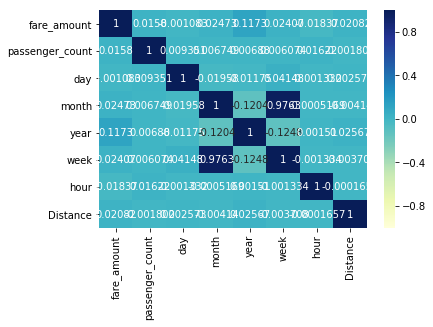

In [42]:
import seaborn as sns
sns.heatmap(corr,vmax=1,vmin=-1,fmt='.4g',annot=True,cmap="YlGnBu")

In [38]:
#VIF Calculation
def vif_cal(input_data, dependent_col):
   x_vars=input_data.drop([dependent_col], axis=1)
   xvar_names=x_vars.columns
   for i in range(0,xvar_names.shape[0]):
       y=x_vars[xvar_names[i]]
       x=x_vars[xvar_names.drop(xvar_names[i])]
       rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared
       vif=round(1/(1-rsq),2)
       print (xvar_names[i], " VIF = " , vif)

In [39]:
#for i in range(X.shape[1]):
import statsmodels.formula.api as sm
vif_cal(X,'fare_amount')

passenger_count  VIF =  1.0
day  VIF =  1.09
month  VIF =  23.15
year  VIF =  1.02
week  VIF =  23.2
hour  VIF =  1.0
Distance  VIF =  1.0


In [41]:
X1=X
X1=X1.drop('month',axis=1)

#for i in range(X.shape[1]):
import statsmodels.formula.api as sm
vif_cal(X1,'fare_amount')

passenger_count  VIF =  1.0
day  VIF =  1.0
year  VIF =  1.02
week  VIF =  1.02
hour  VIF =  1.0
Distance  VIF =  1.0


In [52]:
X=train.drop(['fare_amount','key','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','month'
             ],axis=1)
y=train.fare_amount

X.head()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30)

In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
sc1=StandardScaler()
y_train = sc1.fit_transform(y_train.values.reshape(-1,1))
y_test = sc1.transform(y_test.values.reshape(-1,1))

In [54]:
#X_train

In [55]:
from sklearn.ensemble import RandomForestRegressor
knn=RandomForestRegressor()
knn.fit(X_train,y_train)

/home/abhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [56]:
knn1=knn.predict(X_test)
knn1

array([-0.39063497, -0.30823204, -0.57295146, ..., -0.55647087,
       -0.57295146, -0.39578515])

In [57]:
from sklearn.metrics import r2_score

In [58]:
r2_score(y_test, knn1)*100


70.98235616855162

In [59]:
from xgboost import XGBRegressor
xg=XGBRegressor()
print(X_train.shape)
print(y_train.shape)
xg.fit(X_train,y_train)

(70000, 6)
(70000, 1)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [60]:
xg1=xg.predict(X_test)
r2_score(y_test, xg1)*100

75.73776254215086